In [2]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from time import time

plt.rcParams['figure.figsize'] = [15, 6]
folder = 'data/subset_homework'

In [3]:
def load_class_images(class_id):
    fnames = os.listdir(os.path.join(folder, f'class_id_{class_id}'))
    images = [cv2.imread(os.path.join(folder, f'class_id_{class_id}', f), cv2.IMREAD_UNCHANGED) for f in fnames]
    labels = [class_id] * len(images)
    return images, labels

In [4]:
images, labels = [], []
num_classes = 2  

for class_id in range(num_classes):
    imgs, lbls = load_class_images(class_id)
    images.extend(imgs)
    labels.extend(lbls)

In [5]:
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Num samples per class:', [labels.tolist().count(i) for i in range(num_classes)])
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Num samples per class: [2220, 2250]
Images shape: (4470, 28, 28)
Labels shape: (4470,)


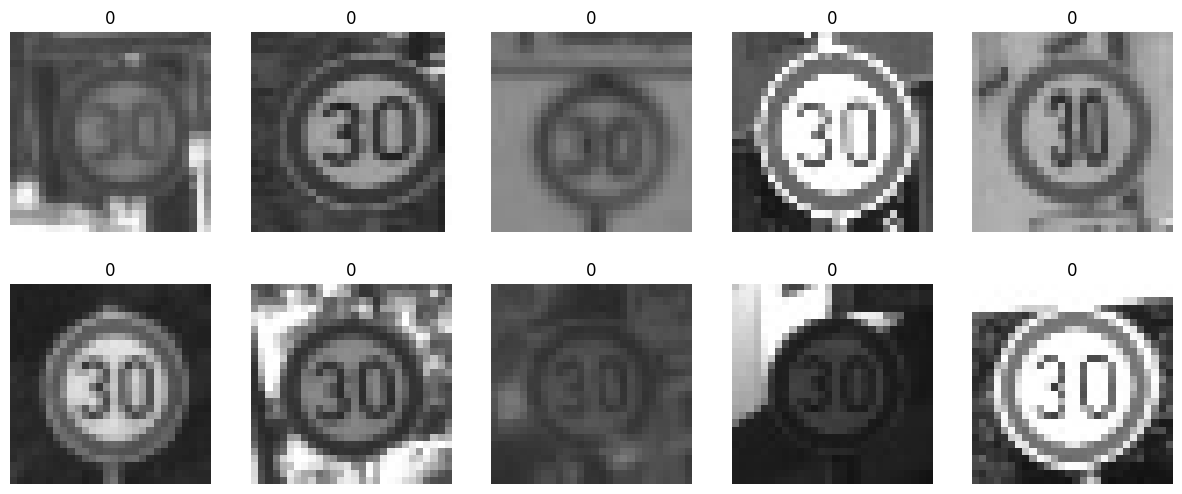

In [6]:
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

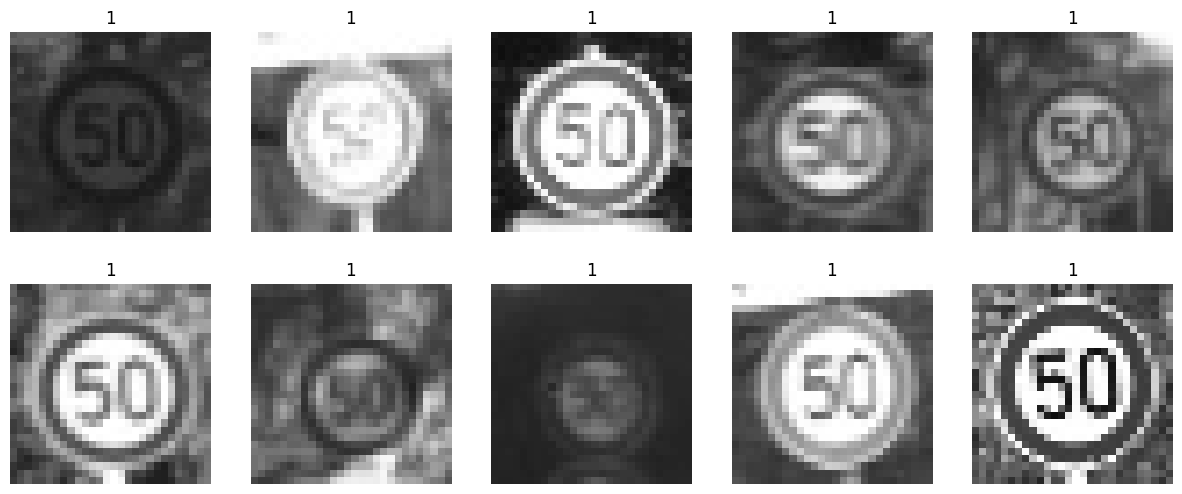

In [7]:
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [8]:
pixels = np.array([image.flatten() for image in images]) / 255.0
print('Flattened pixels shape:', pixels.shape)

Flattened pixels shape: (4470, 784)


In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [10]:
input_shape = (pixels.shape[1],)
inputs = Input(shape=input_shape)
x = Dense(128, activation='relu')(inputs)  
x = Dense(64, activation='relu')(x)        
outputs = Dense(num_classes, activation='softmax')(x)  

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,866 (425.26 KB)

 Trainable params: 108,866 (425.26 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6243 - loss: 0.6482 - val_accuracy: 0.7942 - val_loss: 0.5022
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4729 - val_accuracy: 0.8132 - val_loss: 0.4075
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8748 - loss: 0.3333 - val_accuracy: 0.8624 - val_loss: 0.3270
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9101 - loss: 0.2498 - val_accuracy: 0.9183 - val_loss: 0.2404
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9189 - loss: 0.2176 - val_accuracy: 0.7204 - val_loss: 0.6301
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8946 - loss: 0.2654 - val_accuracy: 0.9441 - val_loss: 0.1869
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.1880 - val_accuracy: 0.8781 - val_loss: 0.2842
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.2398 - val_accuracy: 0.

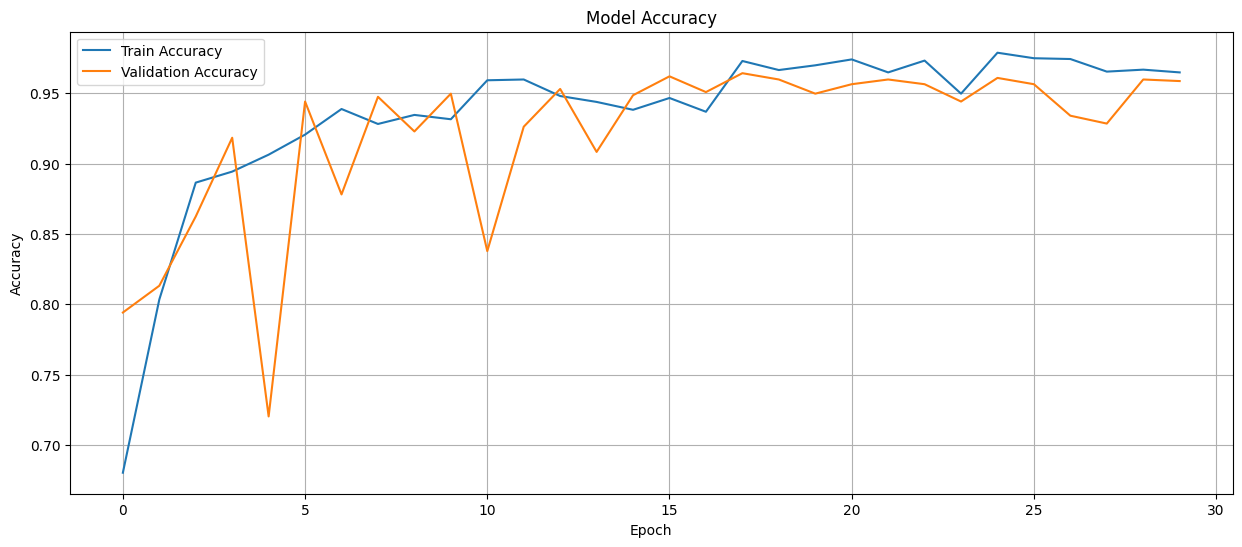

In [12]:
history = model.fit(pixels, labels, epochs=30, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

[ 0.00528781 -0.00726543 -0.00512599 -0.02163723 -0.00609379 -0.00581496
 -0.03266313  0.12689985 -0.02710321  0.12667136 -0.1443557   0.00938046
 -0.00919292 -0.0057891   0.01317954 -0.00715505  0.03039829 -0.00597357
 -0.01549055 -0.00600053  0.03245372 -0.00599396 -0.00194046  0.00926729
  0.03430749  0.00499858 -0.00593686 -0.00772757 -0.02018964  0.08797285
  0.05462583  0.03912647 -0.01056767  0.         -0.01014187  0.02073433
  0.01353131  0.          0.00942279 -0.00255977 -0.01462351  0.0420645
 -0.00599516 -0.01260215  0.00051738 -0.0022352  -0.00600213 -0.01043315
  0.05844564 -0.00103481  0.02537898 -0.00510592  0.0011425  -0.00940949
  0.13146146 -0.00126477  0.0371337  -0.00224909 -0.00596762  0.04653941
 -0.00532697  0.01283856 -0.00480324 -0.00393675  0.0788699  -0.01303112
 -0.00029276 -0.07245363  0.01190253 -0.00329348  0.04654977 -0.00755935
 -0.00541598 -0.00533533 -0.00860621  0.01098722  0.02521186 -0.00598622
  0.10083741  0.01888568 -0.00499199 -0.00995589  0.

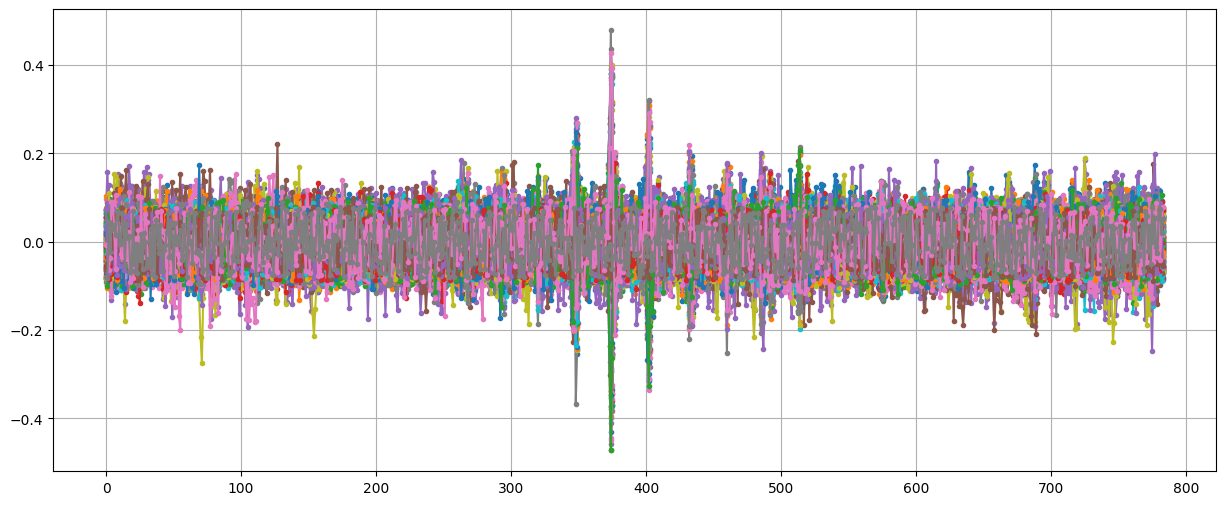

In [16]:
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [13]:
# Evaluate the model
accuracy = model.evaluate(pixels, labels)[1]
print('Final model accuracy:', accuracy)

# Predictions
predictions = model.predict(pixels)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
correct = np.sum(predicted_classes == labels)
total = len(labels)
print('Accuracy:', correct / total)

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9825 - loss: 0.0569
Final model accuracy: 0.9787471890449524
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9787472035794184


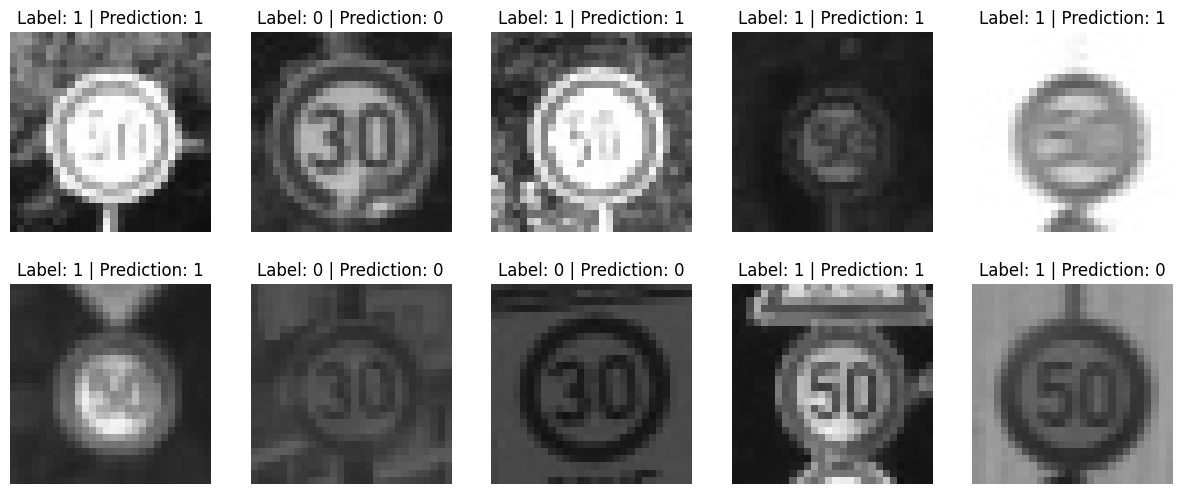

In [14]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels[idx]} | Prediction: {predicted_classes[idx]}')
    plt.axis(False)
plt.show()